# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [95]:
# Checking the number of mice.
mice_count = merged_df['Mouse ID'].nunique()
mice_count

249

In [96]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicatess = duplicates['Mouse ID'].unique()
duplicatess

array(['g989'], dtype=object)

In [97]:
# Optional: Get all the data for the duplicate mouse ID. 


In [98]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = cleaned_df['Mouse ID'].nunique()
clean_mice_count

249

## Summary Statistics

In [100]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# set index
regimen_data = cleaned_df.set_index(['Drug Regimen'])
# group data by drug regimen
regimen_grp = regimen_data.groupby('Drug Regimen')
# stats
mean = regimen_grp['Tumor Volume (mm3)'].mean()
median = regimen_grp['Tumor Volume (mm3)'].median()
var = regimen_grp['Tumor Volume (mm3)'].var()
sem = regimen_grp['Tumor Volume (mm3)'].sem()
std = regimen_grp['Tumor Volume (mm3)'].std()

# dataframe
regimen_df = pd.DataFrame({'Mean Tumor Volume': mean,
                           'Median Tumor Volume': median,
                           'Tumor Volume Variance': var,
                           'Tumor Volume Std. Dev': std,
                           'Tumor Volume Std. Err.': sem})

regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [101]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_regimen = regimen_grp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
agg_regimen_df = pd.DataFrame(agg_regimen)
agg_regimen_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

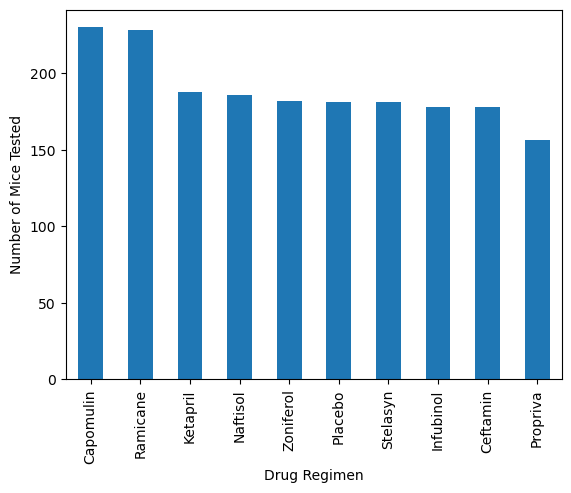

In [102]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
test_mice = cleaned_df[['Drug Regimen', 'Timepoint']]
timepoints = test_mice['Drug Regimen'].value_counts()
timepoints.plot(kind='bar',
                xlabel='Drug Regimen',
                ylabel='Number of Mice Tested')

plt.show()


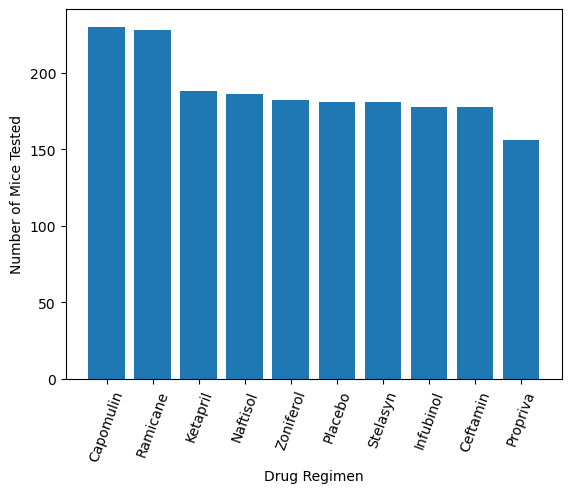

In [103]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_count = timepoints.values
mice_drugs = timepoints.index.values
plt.bar(mice_drugs, drug_count, align='center')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.xticks(rotation=70)
plt.show()


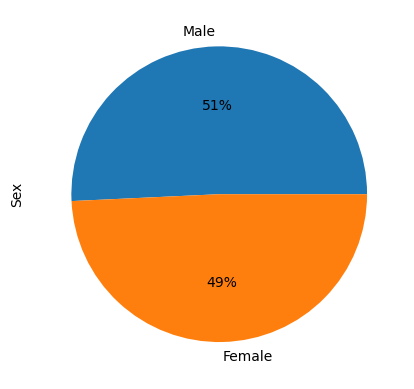

In [104]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = cleaned_df['Sex'].value_counts()
gender = ['Male', 'Female']
male_vs_female.plot(kind='pie', autopct= '%1.0f%%', ylabel='Sex')
plt.show()


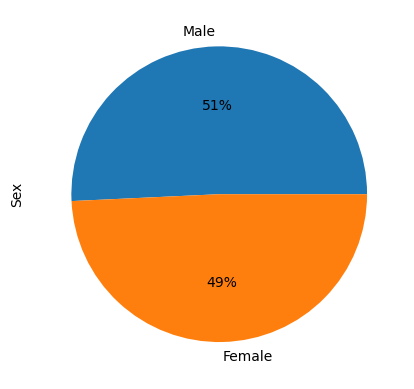

In [105]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = male_vs_female.index.values
count = male_vs_female.values
plt.pie(count, labels=sex, autopct='%1.0f%%')
plt.ylabel('Sex')
plt.show()


## Quartiles, Outliers and Boxplots

In [106]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatments = cleaned_df.loc[(cleaned_df['Drug Regimen']=='Capomulin')
                                 |(cleaned_df['Drug Regimen']=='Ramicane')
                                  |(cleaned_df['Drug Regimen']=='Infubinol')
                                   |(cleaned_df['Drug Regimen']=='Ceftamin') ]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = four_treatments.groupby(['Drug Regimen','Mouse ID']).last()
last_tp = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_last_tp = last_tp[['Drug Regimen', 'Tumor Volume (mm3)']]
new_last_tp

capomulin = new_last_tp.loc[new_last_tp['Drug Regimen']=='Capomulin']
ramicane = new_last_tp.loc[new_last_tp['Drug Regimen']=='Ramicane']
infubinol = new_last_tp.loc[new_last_tp['Drug Regimen']=='Infubinol']
ceftamin = new_last_tp.loc[new_last_tp['Drug Regimen']=='Ceftamin']

four_treatments_df = pd.DataFrame({'Capomulin': capomulin['Tumor Volume (mm3)'],
                                  'Ramicane': ramicane['Tumor Volume (mm3)'],
                                  'Infubinol': infubinol['Tumor Volume (mm3)'],
                                  'Ceftamin': ceftamin['Tumor Volume (mm3)']})
four_treatments_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN
...,...,...,...,...
95,NaN,30.276232,NaN,NaN
96,NaN,40.667713,NaN,NaN
97,NaN,43.166373,NaN,NaN
98,NaN,44.183451,NaN,NaN


In [116]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = []
for x in new_last_tp['Drug Regimen']:
    if x not in treatment:
        treatment.append(x)
treatment

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment:
    quartiles = four_treatments_df[x].quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    print(f'The iqr for {x} is {iqr}')
    # Locate the rows which contain mice on each drug and get the tumor volumes
    array = four_treatments_df[treatment].values
    # add subset 
    
    # Determine outliers using upper and lower bounds
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 * iqr)
    print(f'Lower Bound: {lowerbound}')
    print(f'Upper Bound: {upperbound}')

    # number of outliers
    outliers = np.sum((array < lowerbound) | (array > upperbound))
    print(f'Total Outliers for {x}: {outliers}')

The iqr for Capomulin is 7.781863460000004
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Total Outliers for Capomulin: 37
The iqr for Ceftamin is 15.577752179999997
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999
Total Outliers for Ceftamin: 2
The iqr for Infubinol is 11.477135160000003
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Total Outliers for Infubinol: 24
The iqr for Ramicane is 9.098536719999998
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Total Outliers for Ramicane: 35


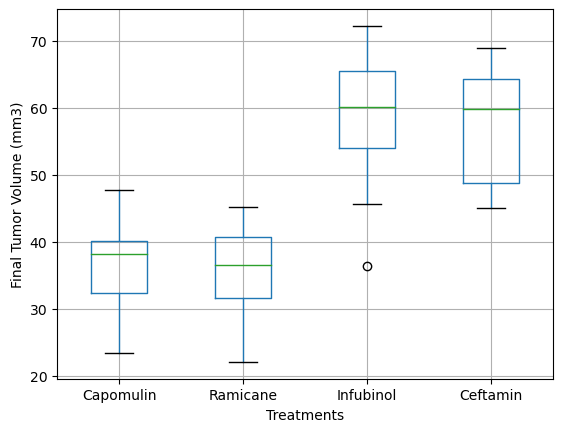

In [108]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
treatment_boxplot = four_treatments_df.boxplot(grid= True)
plt.xlabel('Treatments')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of l509')

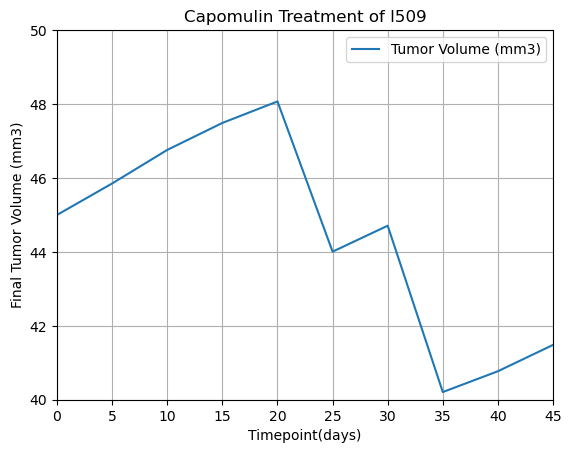

In [109]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_l509_df = cleaned_df.loc[(cleaned_df['Mouse ID'] == 'l509')]
cap_l509_df.plot(x='Timepoint', y='Tumor Volume (mm3)', kind='line',grid=True, ylim=([40,50]), xlim=([0,45]))
plt.xlabel('Timepoint(days)')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Capomulin Treatment of l509')



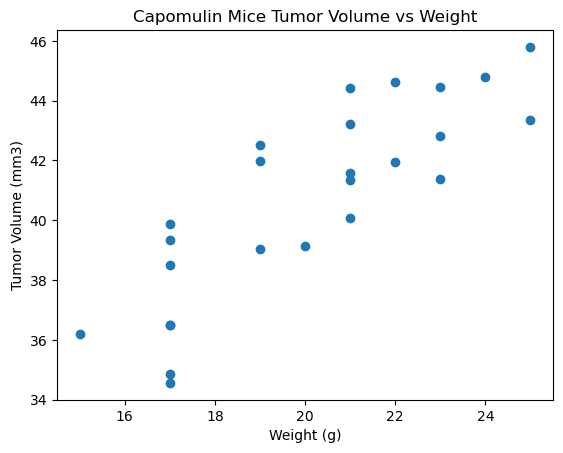

In [110]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df.loc[(cleaned_df['Drug Regimen'] == 'Capomulin')]
capomulin_grouped_df = capomulin_df.groupby('Mouse ID')
weight_avg = capomulin_grouped_df[('Weight (g)')].mean()
tumor_avg = capomulin_grouped_df[('Tumor Volume (mm3)')].mean()

plt.scatter(weight_avg, tumor_avg)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Mice Tumor Volume vs Weight')
plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.84


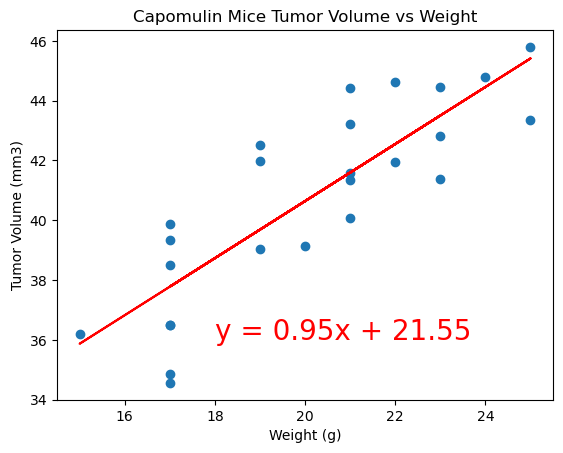

In [111]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(tumor_avg, weight_avg)
print(f'The correlation between mouse weight and the average tumor volume is: {round(correlation[0],2)}')

x = weight_avg
y = tumor_avg

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight_avg, tumor_avg)
plt.plot(weight_avg, regress, 'r-')
plt.annotate(line_eq, (18, 36), fontsize=20, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Mice Tumor Volume vs Weight')
plt.show()